# When to Use Histogram Plots

Date published: 2018-06-13

Category: Data Visualizations

Subcategory: Best Practices

Tags: histogram


**Histograms** visualize the shape of the distribution for a single continuous variable that contains numerical values. A histogram displays data using bars of different heights.

Histograms are slightly similar to vertical bar charts; however, with histograms, numerical values are grouped into **bins**. For example, you could create a histogram of the mass (in pounds) of everyone at your university. In doing so, you'd need to create bins so that the mass of people from 40 pounds to 60 pounds is one bin, and 60 pounds to 80 pounds is another bin, and so forth. 

In histogram plots, the bars should should have no spacing between them.

Similar to box plots, histograms visualize the distribution of a dataset. However, box plots are often more ideal for identifying outliers, if any exist.

Below, I'll walk through a few examples below of when histograms are useful.

#### Import Modules

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
% matplotlib inline

Set visualization styles to make all figure sizes and components larger.

In [57]:
sns.set(rc={'figure.figsize':(11.5, 8.5)})
sns.set_context("talk")

I turn warnings off in this post because of an <a href='https://stackoverflow.com/a/52817582'>issue in Scipy</a> that will be fixed in a later version.

In [58]:
warnings.filterwarnings('ignore')

### Example: Bay Area Bike Share Ride Duration Data

In the San Francisco Bay Area, a company Motivate operates a network of bikes across several cities. You can walk up to a bike, pay and unlock it from a dock, ride it to your destination, and park it in another nearby dock.

There's an option to become a member (aka subscriber) in which you pay a monthly subscription fee that includes unlimited rides that are up to 30 minutes long. When someone becomes a member, they can submit information on their birth year and gender.

For each ride, Motivate records data on the start time, end time, member birth year and member gender.

I'm curious to learn more about the duration of bike rides by customers.

#### Load Dataset on May 2018 Rides

In [59]:
df = pd.read_csv('201805-fordgobike-tripdata.csv')

#### Preview Some Data

In [60]:
df[['start_time', 'end_time', 'duration_sec', 'member_birth_year', 'member_gender']].head()

,start_time,end_time,duration_sec,member_birth_year,member_gender
0,2018-05-31 21:41:51.4750,2018-06-01 13:28:22.7220,56791,NaN,NaN
1,2018-05-31 18:39:53.7690,2018-06-01 09:19:51.5410,52797,1983.0,Male
2,2018-05-31 21:09:48.0150,2018-06-01 09:09:52.4850,43204,NaN,NaN
3,2018-05-31 14:09:54.9720,2018-06-01 08:48:17.8150,67102,1979.0,Male
4,2018-05-31 16:07:23.8570,2018-06-01 08:28:47.2020,58883,1986.0,Male


#### Make New Column for Ride Time in Minutes

They record duration of rides in seconds because it's a granular metric of duration. However, when we discuss bike rides with friends, we typically say 20 minutes, not 1200 seconds.

Below, I create a new column to convert the duration of rides in seconds into minutes.

In [61]:
df['duration_minutes'] = df['duration_sec']/60

#### View Descriptive Statistics of Ride Time in Minutes

Below, we can see the shortest ride was 1 minute and the maximum was 1436 minutes - that's almost a 24 hour ride! 

The 99th percentile value is 91.5 minutes, which is over three times as large as the 95th percentile value of 30.63 minutes.

In [62]:
df['duration_minutes'].describe(percentiles=[.25, .5, .75, .9, .95, .99, .999])

count    179125.000000
mean         14.248406
std          39.942553
min           1.016667
25%           5.700000
50%           9.133333
75%          14.500000
90%          22.600000
95%          30.633333
99%          91.500000
99.9%       687.312667
max        1436.800000
Name: duration_minutes, dtype: float64

#### Plot Histogram of Ride Time in Minutes

Below, I limit my histogram to show rides up to 91 minutes because that's still the 99th percentile. I don't want my visualization to be distorted by outliers. A focus on up to the 99th percentile will help us draw insights on the patterns of the majority of riders.

The Seaborn visualization library in Python automatically determines bin size using the Freedman-Diaconis rule. This is a very convenient feature to have!

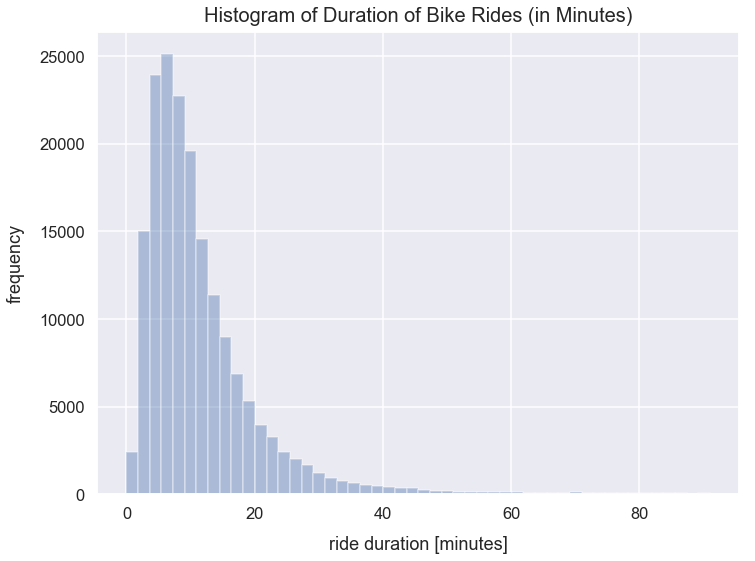

In [63]:
sns.distplot(df['duration_minutes'], kde=False, color='b', hist_kws={"range": [0, 91]})
plt.xlabel("ride duration [minutes]", labelpad=14)
plt.ylabel("frequency", labelpad=14)
plt.title("Histogram of Duration of Bike Rides (in Minutes)", fontsize=20, y=1.01);

#### Interpretation of Bike Ride Duration Histogram

The highest occurence of bike rides are around 7 minutes.

Most bike rides are just from 3 - 15 minutes which I consider fairly short rides. Therefore, I could theorize that bay area bike share members infrequently use these bikes for long strenous exercises riding long distances. Rather, they likely use bike rides for short distances.

The histogram illustrates positive skew. This means there's a long tail on the right side of our peak. Because of this skew, the mean ride duration is larger than the median ride duration. Below, I printed out the mean and median so we can verify that while the mean ride duration is 14.24 minutes, the median is smaller at 9.13 minutes. 

In [64]:
round(df['duration_minutes'].mean(), 2)

14.25

In [65]:
round(df['duration_minutes'].median(), 2)

9.13

#### Relative Frequency Histogram

Previouly, our histogram showed the frequency values on the y-axis. Another version of a histogram illustrates relative frequencies on the y-axis. This is helpful for visualizing the proportion of values in a certain range.

In addition to the arguments set in the histogram above, below I set `bin` to `27` and `norm_hist` to `True`. The `norm_hist` argument when set to `True` shows a density rather than a count on the y-axis.

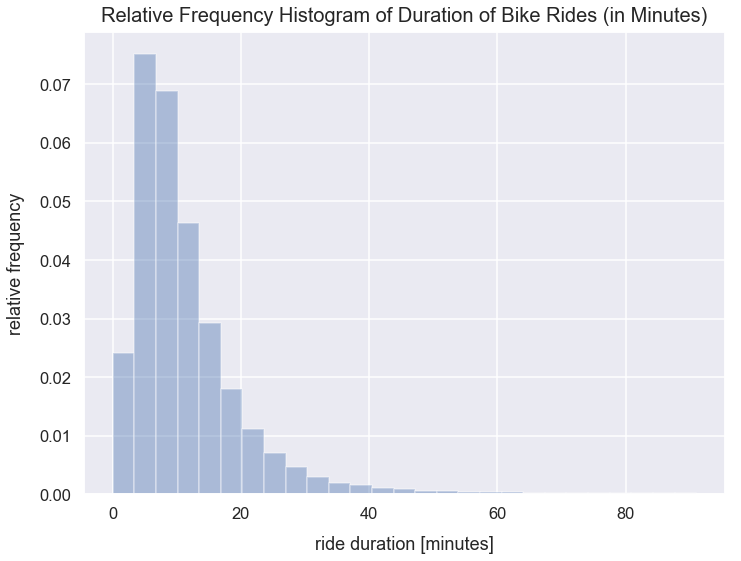

In [66]:
sns.distplot(df['duration_minutes'], bins=27, kde=False, norm_hist=True, color='b', hist_kws={"range": [0, 91]})
plt.xlabel("ride duration [minutes]", labelpad=14)
plt.ylabel("relative frequency", labelpad=14)
plt.title("Relative Frequency Histogram of Duration of Bike Rides (in Minutes)", fontsize=20, y=1.01);

#### Interpretation of Bike Ride Duration Relative Frequency Histogram

Decreasing our bin size in this histogram to 27 increase convenience of interpretation but sacrifices some details.

I can make visual approximations now. Between a ride duration of 0 and 20 minutes there are 6 bars. Each bar covers a span of about 3.3 minutes. Therefore, approximately a proportion of 0.023 rides are between 0 and 3.3 minutes long.

### Example: Age of Bike Riders

I'm curious to learn about the age distribution of members of the bay area bike share program. 

#### Create New Column for Age (in Years)

They record the birth year of members. However, it's easier to interpret the age in years rather than year of birth.

In [67]:
df['age_years'] = 2018 - df['member_birth_year']

#### View Descriptive Statistics on Riders' Age

Below, we can see 18 is the youngest rider and the oldest is 129. However, the 99th percentile is 66 years old, nearly half the age of the maximum rider.

In [68]:
df['age_years'].describe(percentiles=[.25, .5, 0.75, 0.99, 0.9999])

count     167376.000000
mean          35.813575
std           10.320561
min           18.000000
25%           28.000000
50%           33.000000
75%           41.000000
99%           66.000000
99.99%       118.000000
max          129.000000
Name: age_years, dtype: float64

#### Plot Histogram of Age of Bike Riders

I limit the range of the x-axis (age) to be just 18 to 80 so we can more easily visualize the bulk of riders, and disregard the outliers well over 80.

In [69]:
df_age_members = df[df['age_years'].notnull()]['age_years']

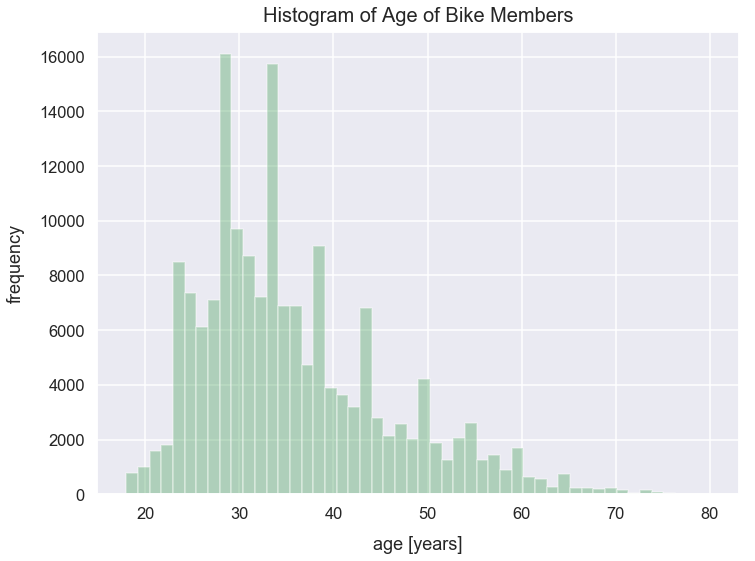

In [70]:
sns.distplot(df_age_members, color='g', kde=False, hist_kws={"range": [18, 80]})
plt.title("Histogram of Age of Bike Members", fontsize=20, y=1.01)
plt.xlabel("age [years]", labelpad=14)
plt.ylabel("frequency", labelpad=14);

#### Interpretation of Histogram of Age of Bike Riders

The most frequent age group of riders is people aged 24 - 35 with a peak around 29.

Past roughly 35 years of age, as people get older, they're less likely to be a member of the bay area bike share program. However, there's still several thousand members who are 55 years or older.

There's a wide range of age of bike riders - from 18 to 60+.

This histogram is positively skewed too. There's a long tail of bins with ever-decreasing frequency that extend to the right of our peak. 